In [121]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [122]:
data = pd.read_csv('survey.csv')

In [124]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [158]:
print(data['Gender'].unique())

[ 9 18 34 21 35 27  4 43  5 28 31 17 20 42 38  8 44 16 24  2  7 33 13 10
  3  1 30 14 36 19 23 26 37 25 12 41 11 15 29  0 22 40 32  6 39]


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [126]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [139]:
print(data.isnull().sum())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [140]:
print(data['Gender'].value_counts())



Gender
18    937
9     221
34     34
31     15
16      4
19      3
28      3
5       2
23      2
10      2
12      2
35      1
21      1
20      1
17      1
4       1
43      1
27      1
44      1
8       1
42      1
7       1
33      1
13      1
3       1
1       1
24      1
2       1
38      1
36      1
14      1
30      1
26      1
37      1
25      1
41      1
11      1
15      1
29      1
0       1
22      1
40      1
32      1
6       1
39      1
Name: count, dtype: int64


In [141]:
#Normalizasyon
data['Gender'] = data['Gender'].replace(['Male', 'male', 'M'], 'Male')
data['Gender'] = data['Gender'].replace(['Female', 'female', 'F'], 'Female')


In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])


In [159]:
print(data['Gender'].unique())

[ 9 18 34 21 35 27  4 43  5 28 31 17 20 42 38  8 44 16 24  2  7 33 13 10
  3  1 30 14 36 19 23 26 37 25 12 41 11 15 29  0 22 40 32  6 39]


In [143]:
missing_ratio = data['comments'].isnull().sum() / len(data)
print(f"Missing Ratio: {missing_ratio:.2%}")

Missing Ratio: 86.97%


In [145]:
missing_ratio = data['self_employed'].isnull().sum() / len(data)
print(f"Missing Ratio: {missing_ratio:.2%}")

Missing Ratio: 1.43%


In [146]:
data.drop(columns=['comments'], inplace=True)


In [147]:
#state not important
if 'state' in data.columns:
	data.drop(columns=['state'], inplace=True)
else:
	print("Column 'state' does not exist in the dataframe.")


In [148]:
# Eğer "No" daha yaygınsa ve veri setindeki eksik değerleri "Yes" ile doldurursanız, veri setindeki oranlar değişebilir ve bu modelin sonuçlarını yanıltıcı hale getirebilir.
data['self_employed'] = data['self_employed'].fillna('No')


In [152]:
#kişinin bu konuda bir bilgiye sahip olmadığı anlamına geldi
data['work_interfere'].fillna('Don’t know', inplace=True)


In [153]:
missing_rows = data[data.isnull().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [Timestamp, Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence]
Index: []

[0 rows x 25 columns]


In [154]:

print(data.isnull().sum())

# Eksik değer oranları (%)
missing_ratio = (data.isnull().sum() / len(data)) * 100
print(missing_ratio)


Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64
Timestamp                    0.0
Age                          0.0
Gender                       0.0
Country                      0.0
self_employed                0.0
family_history               0.0
treatment     

In [155]:
data.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,9,United States,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,18,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,18,Canada,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,18,United Kingdom,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,18,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [160]:
# Veri setini tekrar yükleyin
data = pd.read_csv('survey.csv')

# Gender sütunundaki tüm benzersiz değerleri kontrol edin
print(data['Gender'].unique())


['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [173]:
print(data['Gender'].unique())

['Female' 'Male' 'Other' 'Male (CIS)' 'Androgyne' 'cis-female/femme'
 'Guy (-ish) ^_^' 'male leaning androgynous' 'Female (trans)']


In [176]:
# Daha kapsamlı normalizasyon
data['Gender'] = data['Gender'].str.strip()  # Boşlukları temizleme

# 'Male' olarak sınıflandırılacak değerler
male_labels = [
    'M', 'Male', 'male', 'm', 'Make', 'cis male', 'Cis Male', 'guy (-ish)',
    'Mail', 'Mal', 'maile', 'msle', 'male ', 'cis man', 'Malr', 'Male-ish', 'msl', 'Guy', 'Man','Male (CIS)'
]
data['Gender'] = data['Gender'].replace(male_labels, 'Male')

# 'Female' olarak sınıflandırılacak değerler
female_labels = [
    'F', 'Female', 'female', 'f', 'Cis Female', 'femail', 'woman', 'fem',
    'Trans-female', 'femake', 'femal', 'female ', 'Femake', 'Woman', 'female (cis)', 
    'Femake', 'Female (cis)', 'Fem', 'f', 'p', 'Female (trans)'
]
data['Gender'] = data['Gender'].replace(female_labels, 'Female')

# 'Other' olarak sınıflandırılacak değerler
other_labels = [
    'Trans', 'something kinda male?', 'Androgyn','Androgyne', 'Agender', 'Neuter', 
    'queer', 'All', 'Enby', 'fluid', 'non-binary', 'genderqueer', 'androgyne',
    'nah', 'queer/she/they', 'Genderqueer', 'A little about you', 'Nah', 
    'Other', 'Trans woman', 'queer', 'Androgynous', 'cis-female/femme', 
    'Guy (-ish) ^_^', 'male leaning androgynous', 'Female (trans)'
]
data['Gender'] = data['Gender'].replace(other_labels, 'Other')

# Sonuçları kontrol edin
print(data['Gender'].unique())



['Female' 'Male' 'Other']


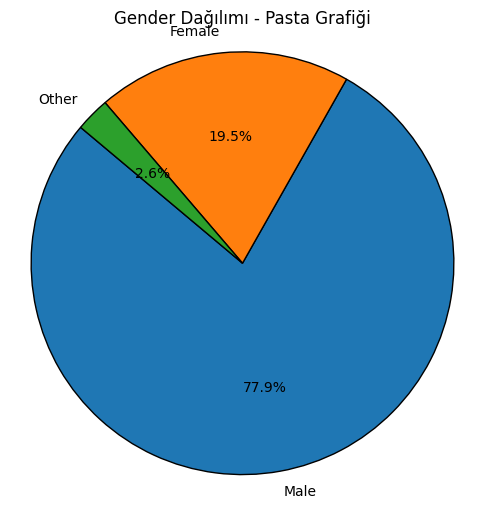

In [184]:
import matplotlib.pyplot as plt

# 'Gender' sütunundaki değerlerin sayısını alın
gender_counts = data['Gender'].value_counts()

# Pasta grafiği oluşturun
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Gender Dağılımı - Pasta Grafiği')
plt.axis('equal')  # Pasta grafiğinin daire şeklinde görünmesi için
plt.show()


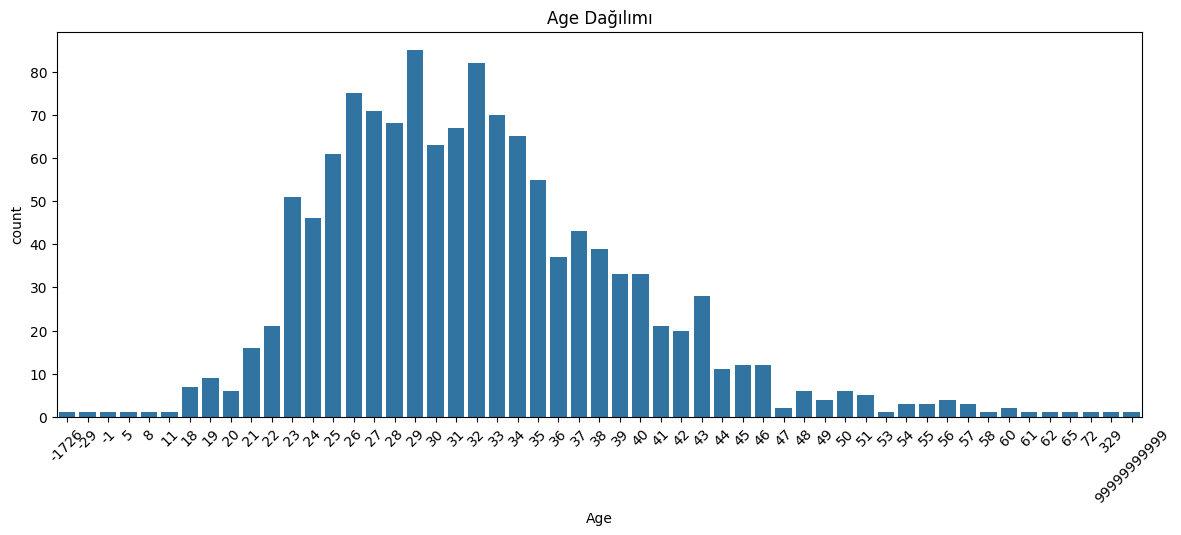

In [182]:
plt.figure(figsize=(14, 5))
sns.countplot(data=data, x='Age')
plt.xticks(rotation=45)
plt.title('Age Dağılımı')
plt.show()

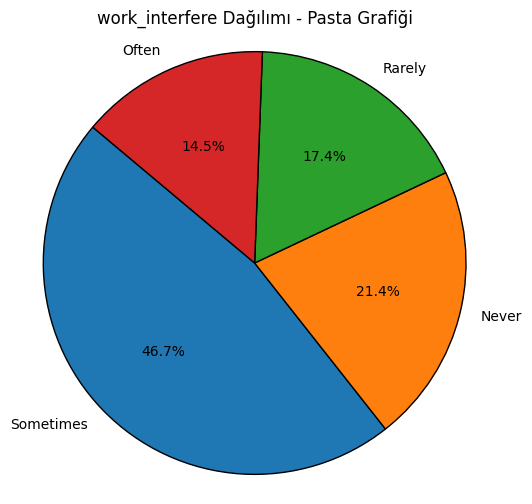

In [186]:
import matplotlib.pyplot as plt

# 'Gender' sütunundaki değerlerin sayısını alın
gender_counts = data['work_interfere'].value_counts()

# Pasta grafiği oluşturun
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('work_interfere Dağılımı - Pasta Grafiği')
plt.axis('equal')  # Pasta grafiğinin daire şeklinde görünmesi için
plt.show()

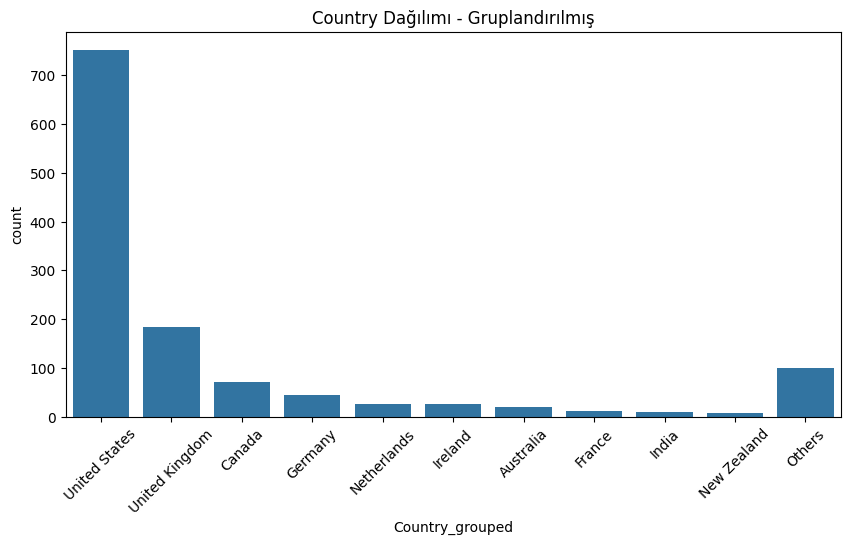

In [194]:
import matplotlib.pyplot as plt
import pandas as pd

# En çok sayıda gözleme sahip ilk 10 ülkeyi bulalım
top_countries = data['Country'].value_counts().nlargest(10)

# Bu ülkeleri "Others" ile değiştirmek için bir kopya oluştur
data['Country_grouped'] = data['Country'].apply(lambda x: x if x in top_countries.index else 'Others')

plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Country_grouped', order=top_countries.index.tolist() + ['Others'])
plt.xticks(rotation=45)
plt.title('Country Dağılımı - Gruplandırılmış')
plt.show()


İşin Ruh Sağlığına Etkisi ile Tedavi İhtiyacı: Grafik, iş yerinde yaşanan ruh sağlığı sorunlarının tedavi alma ihtiyacı üzerinde belirgin bir etkisi olduğunu gösteriyor. Özellikle "Sık sık" (Often) ve "Bazen" (Sometimes) işin ruh sağlığını etkilediğini belirten kişilerde tedavi alma oranı daha yüksek.
İşin Ruh Sağlığını Etkilemediği Durumlar: İşin ruh sağlığını "Asla" (Never) etkilemediğini belirten kişilerin büyük çoğunluğu tedavi almamış durumda. Bu da iş yerindeki baskının veya stresin, tedavi alma ihtiyacını belirgin şekilde artırdığını gösteriyor olabilir.

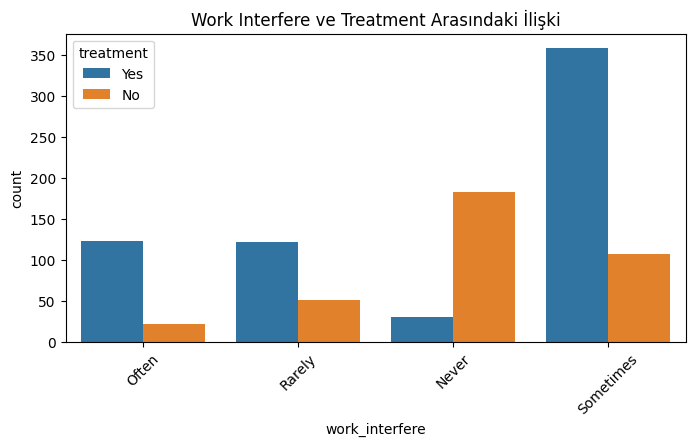

In [198]:
# 'treatment' ve 'work_interfere' arasındaki ilişkiyi görselleştirme
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='work_interfere', hue='treatment')
plt.xticks(rotation=45)
plt.title('Work Interfere ve Treatment Arasındaki İlişki')
plt.show()


Kariyer Üzerine Ruh Sağlığı Etkisi Algısı ve Tedavi İhtiyacı: Grafikte görüldüğü gibi, ruh sağlığı sorunlarının kariyer üzerinde olumsuz etkisi olacağını düşünen kişilerin tedavi alma oranı oldukça yüksek. Bu, iş ortamında ruh sağlığına önem verilmesinin ve bu tür kişilere destek sağlanmasının önemini vurguluyor.
Tedavi Almama Durumu: Ruh sağlığı sorunlarının kariyere etkisi olmadığını düşünen kişilerin tedavi almama oranı oldukça yüksek. Bu durum, kişilerin ruh sağlığı ile kariyer etkisi arasındaki algılarının tedaviye yönelimlerini belirgin bir şekilde etkilediğini gösteriyor olabilir.
Bu grafikten, iş yerinde ruh sağlığı konusundaki algının tedavi davranışlarına doğrudan etki ettiğini, özellikle de ruh sağlığı sorunlarının kariyer üzerindeki etkisi algılandığında tedaviye daha fazla başvurulduğunu söyleyebiliriz.

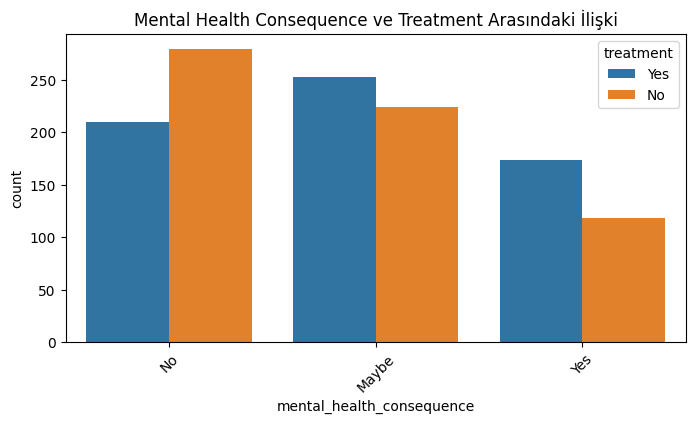

In [199]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='mental_health_consequence', hue='treatment')
plt.xticks(rotation=45)
plt.title('Mental Health Consequence ve Treatment Arasındaki İlişki')
plt.show()


Çoğunlukla işin ruh sağlığı üzerinde etkisi olduğunu belirten kişilerin büyük bir kısmı iş yerinde ruh sağlığı üzerine görüşme yapmamış durumda. Bu, iş yerinde ruh sağlığı hakkında konuşmanın yaygın olmadığını ve bunun da ruh sağlığı üzerinde olumsuz bir etki yaratabileceğini gösteriyor olabilir.
"Maybe" (Belki) veya "Yes" (Evet) şeklinde cevap verenlerin sayısı oldukça düşük, bu da iş yerinde ruh sağlığı konularını ele almanın çok da tercih edilmediğini veya bu konuda yeterince destek olmadığını işaret edebilir.

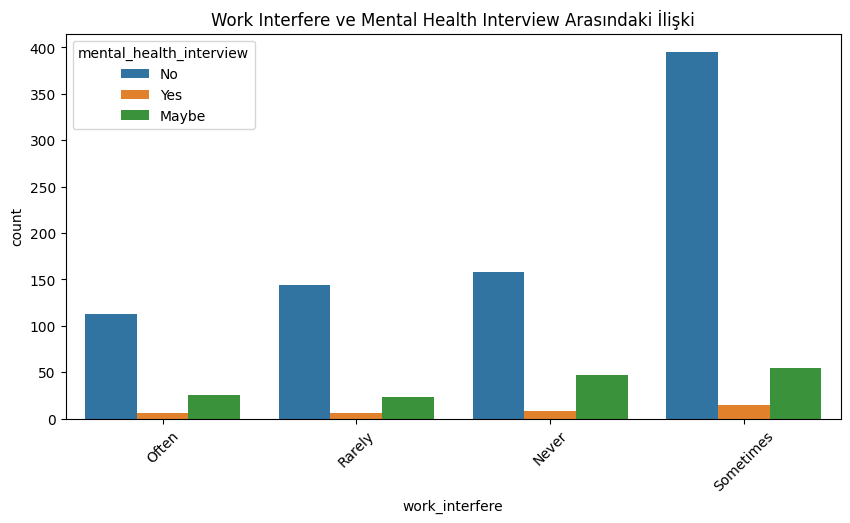

In [200]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='work_interfere', hue='mental_health_interview')
plt.xticks(rotation=45)
plt.title('Work Interfere ve Mental Health Interview Arasındaki İlişki')
plt.show()


- **Yes (Evet):**
İş yerinde fayda sağlayanların büyük bir kısmı (mavi sütun) tedavi gördüğünü belirtmiş.
Aynı grupta fayda sağlandığını ama tedavi görmediğini belirtenlerin sayısı (turuncu sütun) nispeten daha az.
Bu durum, iş yerinde fayda sunulmasının, kişilerin tedavi olma konusunda daha cesur davranmasını sağlıyor olabileceğini gösteriyor.

- **Don't Know (Bilmiyorum):**
Faydaların olup olmadığını bilmeyenler arasında tedavi görenlerin (mavi sütun) sayısı, tedavi görmeyenlere (turuncu sütun) kıyasla biraz daha az.
Bu durum, faydalar konusunda bilgi sahibi olmamanın, tedavi arayışında negatif bir etkisi olabileceğini işaret edebilir.

- **No (Hayır):**
İş yerinde fayda olmadığını belirten kişilerin neredeyse yarısı tedavi gördüğünü, diğer yarısı ise tedavi görmediğini belirtmiş.
Bu, fayda olmamasının tedavi arayışına doğrudan bir etkisi olmadığını gösteriyor olabilir veya farklı bir etkileyici faktörün devrede olduğunu gösterebilir.

- **Çıkarımlar:**
Fayda Sağlanan Ortam: İş yerinde fayda sağlandığında, tedavi arayışına yönelik bir eğilim gözlemlenmiş. Bu da iş yerinde fayda sunmanın ruh sağlığı konusunda daha fazla destek ve cesaret oluşturabileceğine işaret ediyor.
Belirsizlik: İş yerindeki faydaların olup olmadığını bilmeyenler arasında, tedavi görenlerin oranının daha düşük olması, faydalarla ilgili bilinçlenmenin ruh sağlığı desteği almak üzerinde pozitif etkisi olabileceğini gösteriyor olabilir.
Fayda Olmayan Ortam: Fayda olmayan ortamlarda tedavi arayışının daha dengeli olduğu görülüyor. Bu durum, iş yerinde fayda olmamasının kişilerin tedaviye yönelmesi konusunda doğrudan bir engel olmadığı, ancak faydaların sunulmasının tedaviye erişim konusunda önemli bir fark yaratabileceği anlamına gelebilir.

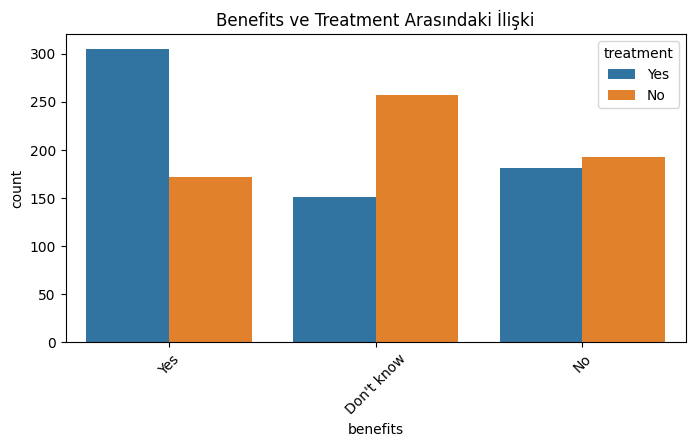

In [202]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='benefits', hue='treatment')
plt.xticks(rotation=45)
plt.title('Benefits ve Treatment Arasındaki İlişki')
plt.show()


İzin Almanın Kolaylığı: Çalışanların ruh sağlığı nedeniyle izin almanın kolay olup olmadığını bilmeleri, tedavi arayışını etkileyen önemli bir faktör gibi görünüyor.
İzin Süreci Bilgisi: "Bilmiyorum" diyen çalışanların tedaviye yönelme oranlarının düşük olması, çalışanların izin süreçleri hakkında daha iyi bilgilendirilmelerinin ruh sağlığı tedavisi arayışını artırabileceğini gösteriyor.
İzin Almanın Zor Olduğu Durumlar: İzin sürecinin zor olması durumunda, tedavi gören kişi sayısının belirgin şekilde az olması, bu durumun tedavi arayışında bir engel oluşturduğunu işaret edebilir.

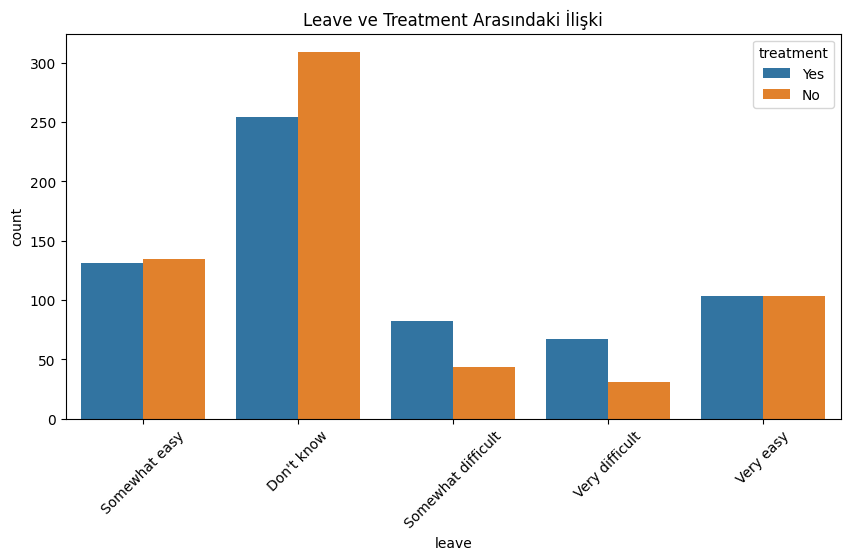

In [203]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='leave', hue='treatment')
plt.xticks(rotation=45)
plt.title('Leave ve Treatment Arasındaki İlişki')
plt.show()


**Family History = No (Aile Geçmişi Yok):**
Bu kategoride tedavi görmeyenlerin (turuncu) sayısı tedavi görenlerden (mavi) oldukça fazladır.
Bu durum, ailede ruh sağlığı geçmişi olmayan kişilerin ruh sağlığı tedavisi alma oranının daha düşük olduğunu göstermektedir. Tedavi arayışında daha az teşvik edici bir faktör olabilir.


**Family History = Yes (Aile Geçmişi Var):**
Aile geçmişinde ruh sağlığı sorunu bulunan kişiler arasında tedavi görenlerin sayısı (mavi), tedavi görmeyenlere göre oldukça fazladır.
Bu durum, aile geçmişinde ruh sağlığı sorunu bulunan kişilerin, bu konuda daha fazla farkındalık sahibi oldukları ve tedavi arayışına daha yatkın olduklarını göstermektedir. Aileden gelen bilgi veya bilinç, tedavi sürecine olumlu etki edebilir.


**Çıkarımlar:**
Aile Geçmişinin Önemi: Ailede ruh sağlığı geçmişinin bulunması, kişinin ruh sağlığı konusunda daha bilinçli ve tedaviye yatkın olmasına neden olabilir.
Tedavi Arayışı: Aile geçmişinde ruh sağlığı problemi olmayanların tedavi arayışında daha az bulunması, ruh sağlığı konusunda bilincin düşük olduğunu veya tedaviye başvurmanın gerekli görülmediğini gösterebilir.
Öneri: Ruh sağlığı konusunda farkındalık yaratmak ve aile geçmişi olmayan bireylerin de ruh sağlığı problemlerinde destek aramalarını teşvik etmek önemli olabilir. Bu sayede, tedavi arayışında eşit fırsatlar sağlanabilir ve ruh sağlığı genel anlamda iyileştirilebilir.
Grafik, ruh sağlığı tedavisi alma kararında aile geçmişinin etkili bir faktör olduğunu ve bu konuda farkındalığın önemli olduğunu göstermektedir.

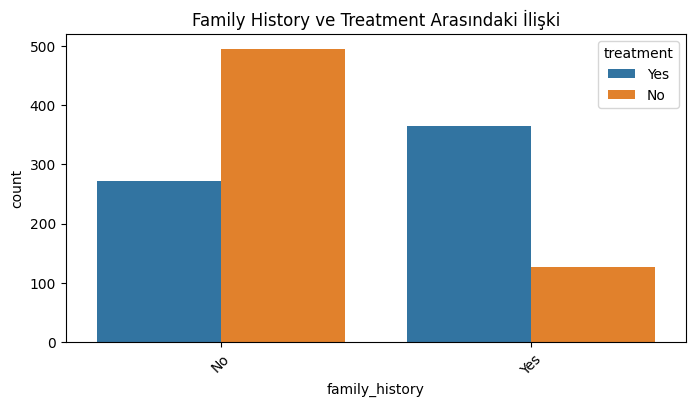

In [206]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='family_history', hue='treatment')
plt.xticks(rotation=45)
plt.title('Family History ve Treatment Arasındaki İlişki')
plt.show()


Kadın ve Tedavi Eğilimi: Kadınların, ruh sağlığı problemleriyle ilgili daha fazla destek aradığı ve tedaviye daha fazla başvurduğu gözlemlenebilir.
Erkek ve Tedavi Eğilimi: Erkeklerin, tedaviye başvurma oranının düşük olması, toplumsal beklentiler veya ruh sağlığı konusundaki farkındalık eksikliğinden kaynaklanabilir.
Diğer Cinsiyetler: Non-binary veya diğer cinsiyet kimliklerinde örnek sayısı oldukça düşük olsa da tedaviye başvurma eğilimi var gibi görünüyor.

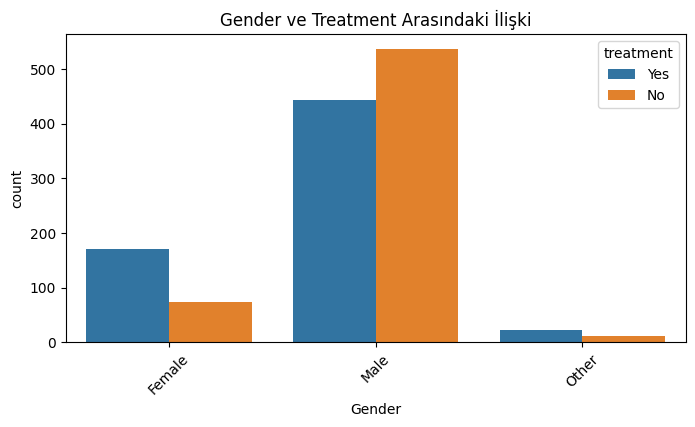

In [208]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='Gender', hue='treatment')
plt.xticks(rotation=45)
plt.title('Gender ve Treatment Arasındaki İlişki')
plt.show()


Bu korelasyon matrisi, veri setinizdeki sayısal sütunlar arasındaki korelasyonları göstermektedir. Korelasyon, iki değişken arasındaki doğrusal ilişkinin gücünü ve yönünü ifade eder. Bu korelasyon matrisi, her bir çift değişken arasındaki korelasyon katsayılarını gösterir. Korelasyon katsayısının değer aralığı -1 ile 1 arasındadır:

- **1**: Mükemmel pozitif korelasyon. Bir değişken arttığında diğeri de aynı oranda artar.
- **-1**: Mükemmel negatif korelasyon. Bir değişken arttığında diğeri aynı oranda azalır.
- **0**: İki değişken arasında doğrusal bir ilişki yoktur.

Korelasyon matrisinde renkler de bu katsayıları görsel olarak daha kolay anlamamıza yardımcı olur:

- **Koyu kırmızı (1'e yakın)**: Güçlü pozitif ilişki.
- **Koyu mavi (-1'e yakın)**: Güçlü negatif ilişki.
- **Açık renkler (0'a yakın)**: Zayıf veya hiç ilişki yok.

**Sonuçları yorumlayalım:**

1. **Age ile diğer değişkenler**: "Age" değişkeni diğer değişkenlerle oldukça düşük korelasyona sahip. Bu, yaşın diğer değişkenler üzerinde çok belirgin bir etkisi olmadığını gösteriyor.

2. **Gender ile treatment**: Korelasyon katsayısı -0.15, yani cinsiyet ile tedavi arasında hafif negatif bir ilişki var. Bu, cinsiyetin (örneğin, kadın veya erkek olmanın) tedavi alma eğilimini bir miktar etkileyebileceğini ancak bu etkinin zayıf olduğunu gösteriyor.

3. **family_history ve treatment**: Korelasyon katsayısı 0.38. Bu iki değişken arasında orta derecede pozitif bir ilişki olduğunu gösteriyor. Yani ailede geçmişte bir ruh sağlığı problemi olması, kişinin tedavi alma ihtimalini artırabilir.

4. **work_interfere ve treatment**: Korelasyon katsayısı -0.036, çok düşük bir korelasyon var. Bu da işteki müdahalenin tedavi alma ile belirgin bir ilişkisinin olmadığını gösteriyor.

5. **benefits ve treatment**: Korelasyon katsayısı 0.23. Bu, "benefits" (faydalar) ve tedavi arasında hafif pozitif bir ilişki olduğunu gösteriyor. Yani çalışanlara sunulan avantajlar, tedavi alma ihtimalini biraz artırabilir.

Bu korelasyon matrisi bize hangi değişkenler arasında ilişki olabileceğini ve bu ilişkilerin ne kadar güçlü olduğunu göstermektedir. Düşük korelasyon değerleri, iki değişken arasında belirgin bir doğrusal ilişki olmadığını, yüksek pozitif ya da negatif korelasyon değerleri ise iki değişkenin birbirini güçlü bir şekilde etkileyebileceğini gösterir. Ancak, bu ilişki nedensellik anlamına gelmez; yani iki değişken arasında korelasyon olması, birinin diğerine neden olduğu anlamına gelmez.

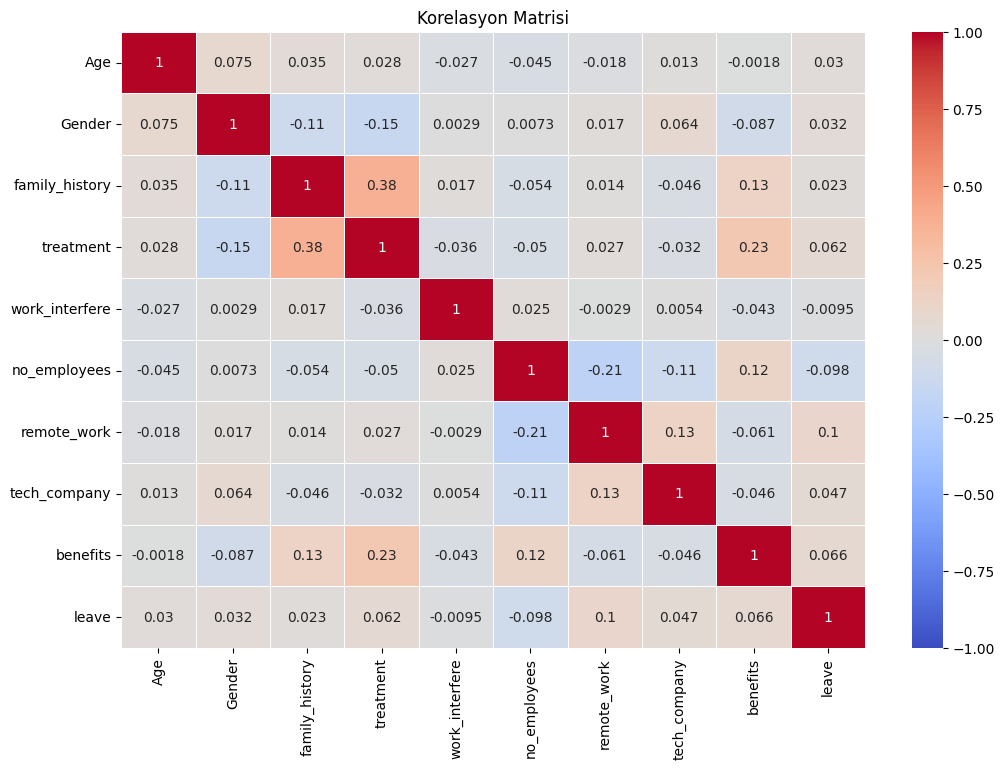

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Kategorik sütunları sayısala dönüştürmek için LabelEncoder kullanımı
encoder = LabelEncoder()

# Kategorik sütunları sayısala dönüştür
categorical_columns = ['Gender', 'family_history', 'treatment', 'work_interfere', 'leave', 'no_employees', 'remote_work', 'tech_company', 'benefits']

for column in categorical_columns:
    if column in data.columns:
        data[column] = encoder.fit_transform(data[column].astype(str))

# Sayısal sütunları seçin
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini oluşturun
correlation_matrix = numeric_data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Korelasyon Matrisi')
plt.show()



In [137]:
categorical_columns = [
    "Gender", "Country", "self_employed", "family_history", "treatment",
    "work_interfere", "remote_work", "tech_company", "benefits", "care_options",
    "wellness_program", "seek_help", "anonymity", "leave", "mental_health_consequence",
    "phys_health_consequence", "coworkers", "supervisor", "mental_health_interview",
    "phys_health_interview", "mental_vs_physical", "obs_consequence","no_employees"
]

# Her kategorik sütun için LabelEncoder uygulama
encoder = LabelEncoder()
for col in categorical_columns:
    # Sadece kategorik veya metin sütunları için işlem yap
    if data[col].dtype == 'object' or data[col].dtype.name == 'category':
        data[col] = encoder.fit_transform(data[col])
        
print(data.head())

             Timestamp  Age  Gender  Country state  self_employed  \
0  2014-08-27 11:29:31   37       0       45    IL              2   
1  2014-08-27 11:29:37   44       1       45    IN              2   
2  2014-08-27 11:29:44   32       1        7   NaN              2   
3  2014-08-27 11:29:46   31       1       44   NaN              2   
4  2014-08-27 11:30:22   31       1       45    TX              2   

   family_history  treatment  work_interfere  no_employees  ...  \
0               0          1               1             4  ...   
1               0          0               2             5  ...   
2               0          0               2             4  ...   
3               1          1               1             2  ...   
4               0          0               0             1  ...   

   mental_health_consequence  phys_health_consequence  coworkers  supervisor  \
0                          1                        1          1           2   
1                     

In [138]:
X = data.drop(columns=["treatment"])  # Özellikler
y = data["treatment"]  # Hedef sütun

# Hedef sütunu encode etme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
# Random Forest Classifier modeli oluşturma
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = rf_model.predict(X_test)
# Sonuçları değerlendirme
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.7738095238095238

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       129
           1       0.77      0.76      0.77       123

    accuracy                           0.77       252
   macro avg       0.77      0.77      0.77       252
weighted avg       0.77      0.77      0.77       252



In [140]:
# Özellik önem düzeylerini inceleme
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nÖzellik Önem Düzeyleri:")
print(importance_df)


Özellik Önem Düzeyleri:
                      Feature  Importance
5              work_interfere    0.156181
0                         Age    0.095652
4              family_history    0.090652
10               care_options    0.064634
1                      Gender    0.056155
6                no_employees    0.051138
2                     Country    0.050516
14                      leave    0.043691
9                    benefits    0.040678
18                 supervisor    0.033730
17                  coworkers    0.033538
20      phys_health_interview    0.033497
15  mental_health_consequence    0.032246
21         mental_vs_physical    0.029564
11           wellness_program    0.027944
12                  seek_help    0.027320
13                  anonymity    0.024466
22            obs_consequence    0.021249
16    phys_health_consequence    0.019950
7                 remote_work    0.019685
19    mental_health_interview    0.018916
8                tech_company    0.015187
3        

ddddddddddddddddddddddddddddddddd